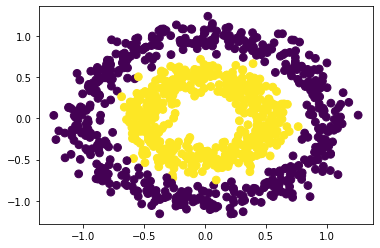

In [2]:
#项目7—项目实训代码
from sklearn.datasets import make_circles  
import matplotlib.pyplot as plt

#使用make_circles()函数生成环形数据
x,y=make_circles(n_samples=1000,factor=0.5,noise=0.1)#factor表示内外圆的比例因子，此参数越大，内外圆距离越近

#显示生成的数据集
plt.scatter(x[:,0],x[:,1],s=60,c=y,marker='o')
plt.show()

In [3]:
from sklearn.svm import SVC     #导入支持向量机分类模块
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np

#拆分数据集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=200,random_state=1)

#使用网格搜索法寻找参数的最优值
param_grid = {'C':[0.1,1, 5, 10, 50, 100], 'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1]}
grid=GridSearchCV(SVC(kernel="rbf",class_weight="balanced"),param_grid=param_grid,cv=5) 
grid.fit(x_train,y_train)
print("参数的最优值为：%s"%grid.best_params_)

参数的最优值为：{'C': 50, 'gamma': 0.1}


In [4]:
#最优模型评估
model=grid.best_estimator_  #获取最优模型
pred=model.predict(x_test)
re=classification_report(y_test,pred)
print("最优模型的评估报告：")
print(re)

最优模型的评估报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       113

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

